In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# reading titanic dataset to df dataframe
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


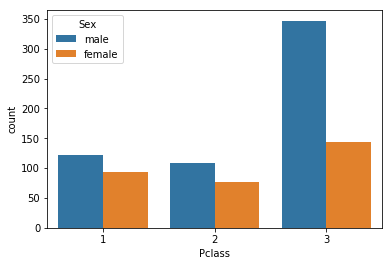

In [19]:
sns.countplot('Pclass', data = df, hue = 'Sex')

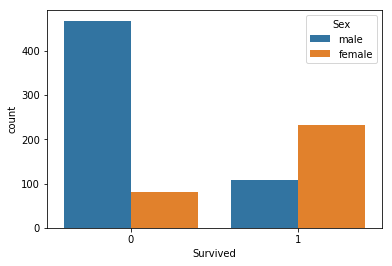

In [22]:
sns.countplot('Survived', data = df, hue = 'Sex')

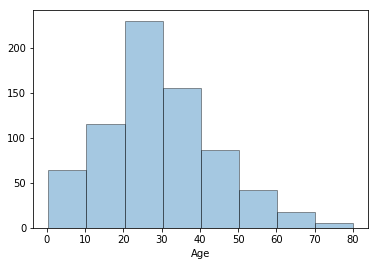

In [36]:
sns.distplot(df.Age.dropna(), kde = False, hist_kws = dict(edgecolor = 'k', linewidth = 1), bins = 8)

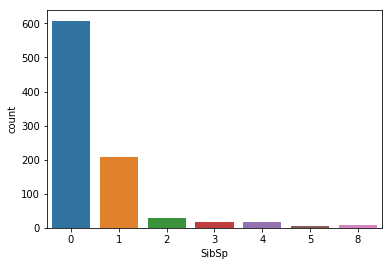

In [38]:
sns.countplot('SibSp', data = df)

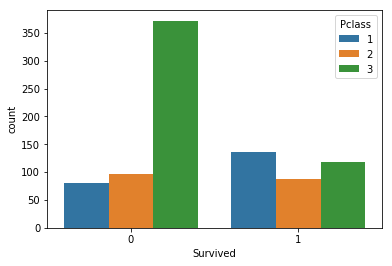

In [40]:
sns.countplot('Survived', data = df, hue = 'Pclass')

In [39]:
# It seems that most of passengers were men at third class, Also the majority of non survival were men
# distribution of age skewed towards youth, Majority fall between 20 and 40 years old.
# majority of non-survival are from third class

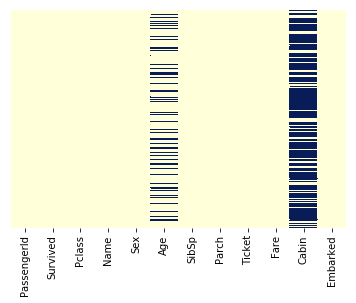

In [45]:
# using heatmap to detect null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'YlGnBu')

In [50]:
# replacing Null age values by the mean of age for each of Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        


In [51]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [54]:
# since Cabin will not be in our model so I'll drop this column

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [58]:
df.drop('Cabin', axis = 1, inplace = True)

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [64]:
# droping any other null values
df.dropna(inplace = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [70]:
# replacing (Sex, Emarked) columns from object to numeric by using get_dummy
sex = pd.get_dummies(df['Sex'], drop_first= True)
embark = pd.get_dummies(df['Embarked'],  drop_first= True)

In [71]:
df.drop(['Name', 'Sex', 'Ticket', 'Embarked'], inplace = True, axis = 1)

In [72]:
df = pd.concat([sex, embark, df], axis = 1)

In [73]:
df.head()

,male,Q,S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,1,0,3,22.0,1,0,7.2500
1,0,0,0,2,1,1,38.0,1,0,71.2833
2,0,0,1,3,1,3,26.0,0,0,7.9250
3,0,0,1,4,1,1,35.0,1,0,53.1000
4,1,0,1,5,0,3,35.0,0,0,8.0500


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Survived', axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
scaled = scaler.transform(df.drop('Survived', axis =1))

In [77]:
df_scaled = pd.DataFrame(scaled, columns = df.columns.drop('Survived'))

In [78]:
df_scaled.head()

,male,Q,S,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.735342,-0.307941,0.616794,-1.732505,0.825209,-0.531670,0.431350,-0.474326,-0.500240
1,-1.359911,-0.307941,-1.621287,-1.728611,-1.572211,0.680232,0.431350,-0.474326,0.788947
2,-1.359911,-0.307941,0.616794,-1.724718,0.825209,-0.228695,-0.475199,-0.474326,-0.486650
3,-1.359911,-0.307941,0.616794,-1.720825,-1.572211,0.453001,0.431350,-0.474326,0.422861
4,0.735342,-0.307941,0.616794,-1.716931,0.825209,0.453001,-0.475199,-0.474326,-0.484133


In [80]:
X = df_scaled
y = df['Survived']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 3)

In [83]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [84]:
y_predict = KNN.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_predict, y_test))
print(classification_report(y_predict, y_test))

[[95 16]
 [21 46]]
             precision    recall  f1-score   support

          0       0.82      0.86      0.84       111
          1       0.74      0.69      0.71        67

avg / total       0.79      0.79      0.79       178



In [87]:
len(y_test)

178

In [89]:
# choosing best K value
error = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors= i)
    KNN.fit(X_train, y_train)
    pred_i = KNN.predict(X_test)
    error.append(np.mean(y_test != pred_i))

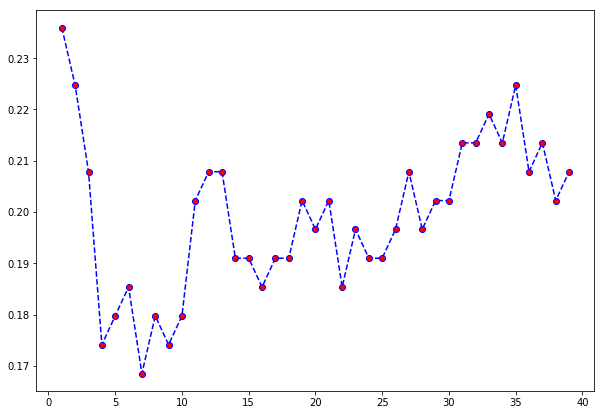

In [94]:
Xticks = np.arange(0, 41)
plt.figure(figsize = (10,7))
plt.plot(range(1,40), error, marker = 'o', c = 'b', markerfacecolor = 'red', ls = '--', )

In [95]:
# choosing K = 7

In [97]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 7)

In [98]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [99]:
y_predict = KNN.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_predict, y_test))
print(classification_report(y_predict, y_test))

[[98 12]
 [18 50]]
             precision    recall  f1-score   support

          0       0.84      0.89      0.87       110
          1       0.81      0.74      0.77        68

avg / total       0.83      0.83      0.83       178

